In [2]:
import numpy as np
import pickle
import random
import matplotlib.pyplot as plt
import math

In [3]:
data = pickle.load(open('data/backprop-data.pkl', 'rb'), encoding='latin1')

In [4]:
# Assemble Dataset
labels=data['labels']
vectors=data['vectors']
labels=labels.T[0]
vectors=vectors.T
input_bias=np.ones(200)
vectors=np.c_[vectors,input_bias]

In [5]:
# Network is an array of dictionaries 
# First list corresponds to layer
# Second list responds to the unit(neuron) in the respective layer
# Each of the units contains a dictionary containing randomly set weights 
def create_network():
    hidden_layer=[]
    network=[]
    for i in range(10):
        hidden_layer.append({'weights':np.array([random.random() for i in range(2+1)])})
    output_layer=[{'weights':np.array([random.random() for i in range(11)])}]
    network.append(hidden_layer)
    network.append(output_layer)
    return network

In [6]:
# Summation, activation and dervitative functions

def activation(weights,inputs):
    activate=(weights)*(inputs)
    activate=np.sum(activate)
    return activate

def tanh(activation):
    transfer=np.tanh(activation)
    return transfer
def sigmoid(activation):
    transfer=1.0/(1.0 + math.exp(-activation))
    return transfer

def sigmoid_derivative(a):
    return a*(1.0-a)

def tanh_derivative(a):
    return 1.0-(a**2)

In [7]:
def forward_prop(network,inputs):
    
    for layer in network:
        new_inputs=[]
    
#     For each neuron in a layer, compute the summation and activation function
        for neuron in layer:
            activate=activation(neuron['weights'], inputs)

#      Tanh or sigmoid activation function based on layer
            if len(list(neuron.values())[0])==3:
                transfer=tanh(activate)
            else:
                transfer=sigmoid(activate)
            
#             Save value of the activation function to be used for back propogation
            neuron['transfer']=transfer
    
#     Inputs of next layer are the activation function values of the previous layer
            new_inputs.append(neuron['transfer'])
    
        new_inputs.append(1)
        inputs=new_inputs
    
#     Return final prediction
    output=network[1][0]['transfer']
    return output

In [8]:
def back_prop(network,target,vectors):
    output=network[1][0]['transfer']
#     output=layer[0]['transfer']
    for j in range(11):
        if j==10:
            yi=1
        else:
            yi=network[0][j]['transfer']
        w2_delta=learning_rate*(target-output)*sigmoid_derivative(output)*(yi)
        network[1][0]['weights'][j]=network[1][0]['weights'][j] + w2_delta

    for j in range(len(network[0])):
        tan_der=tanh_derivative(network[0][j]['transfer'])
        for i in range(3):
            xi=vectors[i]
            output_error=learning_rate*(target-output)*sigmoid_derivative(output)
            w_j_k=network[1][0]['weights'][j+1]
            g_primeb=tan_der
            wi_delta=(output_error)*(w_j_k)*(g_primeb)*xi
            network[0][j]['weights'][i]=network[0][j]['weights'][i]+wi_delta
        

In [9]:
def thresholding(output):
    if output>0.5:
        return 1
    else:
        return 0

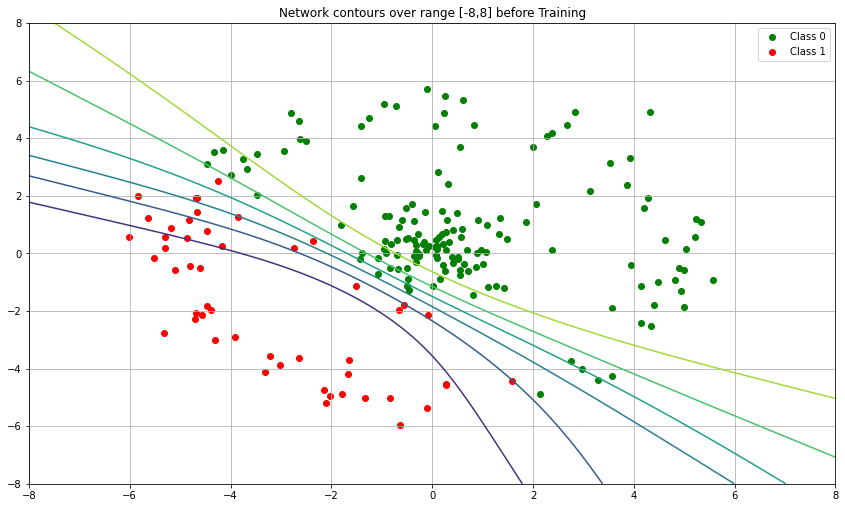

In [13]:
x=np.linspace(-8,8,200)
y=np.linspace(-8,8,200)
new_net=create_network()
before_train=np.zeros((len(x),len(y)))
for i in range(len(y)):
    for j in range(len(x)):
        arr=np.array([x[i],x[j],1])
        before_train[i,j]=forward_prop(new_net,arr)
        
fig=plt.figure(figsize=(14,8))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
ax.grid()
contour_plot=plt.contour(x,y,before_train)
x_0=[]
y_0=[]

x_1=[]
y_1=[]

for i in range(len(vectors)):
    arr=vectors[i]
    output=forward_prop(new_net,arr)
    tresh_value=thresholding(output)
    if tresh_value==1:
        x_0.append(arr[0])
        y_0.append(arr[1])
    if tresh_value==0:
        x_1.append(arr[0])
        y_1.append(arr[1])

plt.scatter(x_0,y_0,c='green', label='Class 0')
plt.scatter(x_1,y_1,c='red', label='Class 1')
plt.title('Network contours over range [-8,8] before Training')
plt.legend()
plt.show()

In [15]:
trained_net=create_network()
outputs=[]
learning_rate=0.1
for i in range(1000):
    for i in range(len(vectors)):
        vector=vectors[i]
        label=labels[i]
        outputs.append(forward_prop(trained_net,vector))
        back_prop(trained_net,label,vector)

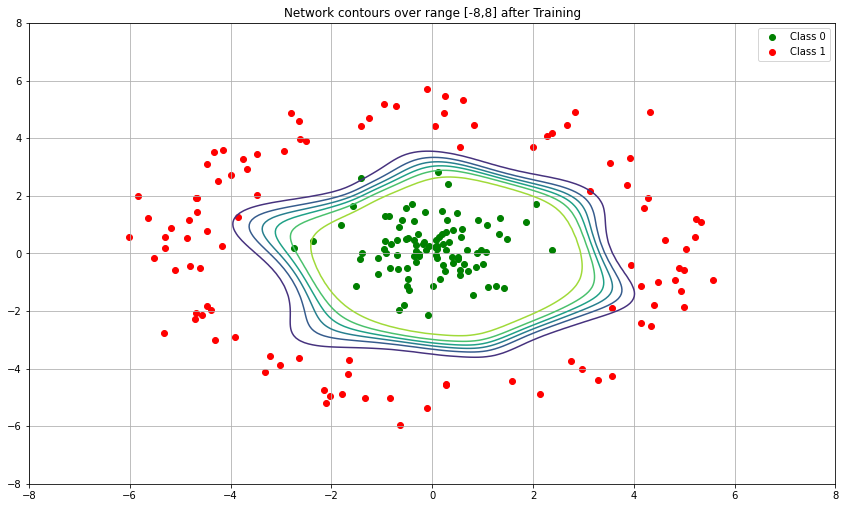

In [17]:
x=np.linspace(-8,8,200)
y=np.linspace(-8,8,200)
after_train=np.zeros((len(x),len(y)))
for i in range(len(y)):
    for j in range(len(x)):
        arr=np.array([x[i],x[j],1])
        after_train[i,j]=forward_prop(trained_net,arr)
        
fig=plt.figure(figsize=(14,8))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
ax.grid()
contour_plot=plt.contour(x,y,after_train)
x_0=[]
y_0=[]

x_1=[]
y_1=[]

for i in range(len(vectors)):
    arr=vectors[i]
    output=forward_prop(trained_net,arr)
    tresh_value=thresholding(output)
    if tresh_value==1:
        x_0.append(arr[0])
        y_0.append(arr[1])
    if tresh_value==0:
        x_1.append(arr[0])
        y_1.append(arr[1])

plt.scatter(x_0,y_0,c='green', label='Class 0')
plt.scatter(x_1,y_1,c='red', label='Class 1')
plt.title('Network contours over range [-8,8] after Training')
plt.legend()
plt.show()
